# Homework 1: Build an ML Workflow for Text Classification

## Part 1: Develop a Machine Learning Workflow for Classification

### Module 1: Frame the Problem and look at the big picture

### Module 2: Get the original Data

In [ ]:
#@title Loading the data

import pandas as pd

text_data_Group24 = pd.read_csv("/content/drive/MyDrive/CSCI5750/sentiment labelled sentences/homework01_text_data_group24.csv")

text_data_Group24

,reviews,class
0,Penne vodka excellent!,1
1,It was delicious!!!,1
2,Food was below average.,0
3,We enjoy their pizza and brunch.,1
4,The menu had so much good stuff on it i could ...,1
...,...,...
995,"Overall, I was very disappointed with the qual...",0
996,It's worth driving up from Tucson!,1
997,"When my order arrived, one of the gyros was mi...",0
998,"Overall, a great experience.",1


In [ ]:
#@title Get the frequency of each class in the data

count_class_0 = (text_data_Group24['class'] == 0).sum()
count_class_1 = (text_data_Group24['class'] == 1).sum()

print("frequency of Class 0:", count_class_0, "Frequency of Class 1:", count_class_1)

frequency of Class 0: 500 Frequency of Class 1: 500


In [ ]:
#@title Data Preprocessing and Word Count Table

# Get the corpus from the dataset
group24_sentence = text_data_Group24['reviews']

# print out the list of all documents
group24_sentence

,reviews
0,Penne vodka excellent!
1,It was delicious!!!
2,Food was below average.
3,We enjoy their pizza and brunch.
4,The menu had so much good stuff on it i could ...
...,...
995,"Overall, I was very disappointed with the qual..."
996,It's worth driving up from Tucson!
997,"When my order arrived, one of the gyros was mi..."
998,"Overall, a great experience."


In [ ]:
# creating vocabulary to map words into their index using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=0.0, lowercase=False, stop_words='english')

print("Test sequence: ",group24_sentence[0:2])
vectorizer.fit(group24_sentence[0:2]) # test the vocabulary on first two sentences
print("Vocabulary: ",vectorizer.vocabulary_)

Test sequence:  0    Penne vodka excellent!
1       It was delicious!!!
Name: reviews, dtype: object
Vocabulary:  {'Penne': 1, 'vodka': 4, 'excellent': 3, 'It': 0, 'delicious': 2}


In [ ]:
#@title Split the data into train/test dataset with ratio 80/20

from sklearn.model_selection import train_test_split

group24_labels = text_data_Group24['class']

sentences_train_group24, sentences_test_group24, y_train_group24, y_test_group24 = train_test_split(
    group24_sentence,
    group24_labels,
    test_size=0.2,
    random_state=42
)

In [ ]:
#check the dimensions of the data
print("sentences_train_group24.shape:", sentences_train_group24.shape)
print("sentences_test_group24.shape:", sentences_test_group24.shape)
print("y_train_group24.shape:", y_train_group24.shape)
print("y_test_group24.shape:", y_test_group24.shape)

sentences_train_group24.shape: (800,)
sentences_test_group24.shape: (200,)
y_train_group24.shape: (800,)
y_test_group24.shape: (200,)


### Module 3: Explore and visualize the data to gain insights

In [ ]:
#@title Task M3.1.a Report the frequency of classes in train and test dataset

count_class_0_train = (y_train_group24 == 0).sum()
count_class_1_train = (y_train_group24 == 1).sum()

print("frequency of Class 0 in the train set:", count_class_0_train, "Frequency of Class 1 in the train set:", count_class_1_train)

frequency of Class 0 in the train set: 396 Frequency of Class 1 in the train set: 404


In [ ]:
# Perform the same analysis on the test dataset
count_class_0_test = (y_test_group24 == 0).sum()
count_class_1_test = (y_test_group24 == 1).sum()

print("frequency of Class 0 in the test set:", count_class_0_test, "Frequency of Class 1 in the test set:", count_class_1_test)

frequency of Class 0 in the test set: 104 Frequency of Class 1 in the test set: 96


#### These classes are balanced in both the training and test datasets

In [ ]:
#@title Task M3.1.b Visualize the positive texts and negative texts in the training data using WordCloud

# Import all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

commentWords = ''
stopwords = set(STOPWORDS)

# join the review and class labels into a dataframe
train_data = pd.DataFrame({'review': sentences_train_group24, 'class': y_train_group24})

#split the reviews into positive and negative
positive_reviews = train_data[train_data['class']==1]
negative_reviews = train_data[train_data['class']==0]

In [ ]:
# Generate the words for the positive and negative reviews

def generate_words(df):
  comment_words = ''
  stopwords = set(STOPWORDS)

  for val in df['review']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
      tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "

  return comment_words

positive_words = generate_words(positive_reviews)
negative_words = generate_words(negative_reviews)

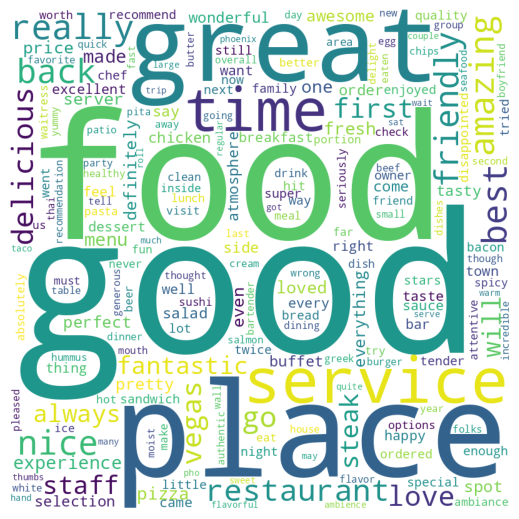

In [ ]:
# Plot the WordCloud image for the positive words
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(positive_words)

plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

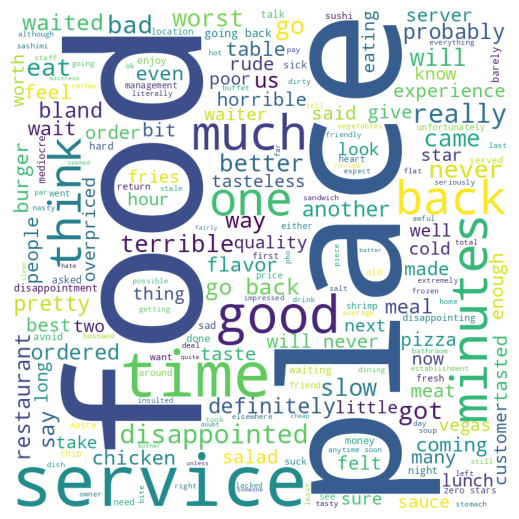

In [ ]:
# Plot the WordCloud image for the negative words
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(negative_words)

plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

### Module 4: Prepare the training data for Machine Learning Algorithms

In [ ]:
#@title Vectorize the training/testing datasets
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=0.0, lowercase=False, stop_words='english')
vectorizer.fit(sentences_train_group24)

CountVectorizer(lowercase=False, min_df=0.0, stop_words='english')

In [ ]:
#save the vectorizer to disk
dump(vectorizer, "homework01_vectorizer")

['homework01_vectorizer']

In [ ]:
# check the vocabulary
print("Vocabulary: ",vectorizer.vocabulary_)
print("Vocabulary words: ",vectorizer.vocabulary_.keys())
print("Vocabulary index: ",vectorizer.vocabulary_.values())

Vocabulary:  {'waited': 1767, 'We': 426, 'll': 1155, 'Both': 72, 'truly': 1715, 'unbelievably': 1725, 'good': 964, 'glad': 955, 'went': 1798, 'food': 926, 'rich': 1466, 'order': 1274, 'accordingly': 451, 'The': 387, 'salad': 1486, 'just': 1105, 'right': 1468, 'sauce': 1501, 'power': 1371, 'scallop': 1508, 'perfectly': 1327, 'cooked': 691, 'shrimp': 1550, 'tender': 1670, 'moist': 1217, 'Very': 414, 'lunch': 1176, 'spot': 1594, 'Definitely': 112, 'turn': 1721, 'doubt': 804, 'unless': 1733, 'buying': 604, 'Waitress': 425, 'little': 1151, 'slow': 1564, 'service': 1532, 'seasonal': 1512, 'fruit': 938, 'fresh': 931, 'white': 1800, 'peach': 1318, 'puree': 1395, 'fair': 881, 'best': 545, 'What': 429, 'did': 768, 'bother': 573, 'dish': 792, 'quite': 1405, 'appalling': 476, 'value': 1743, 'Always': 34, 'great': 974, 'time': 1688, 'Dos': 123, 'Gringos': 176, 'You': 443, 'incredibly': 1078, 'fish': 912, 'prepared': 1373, 'care': 616, 'Omelets': 286, 'die': 770, 'From': 157, 'dinner': 776, 'compani

In [ ]:
## create feature vector for each sentence
X_train = vectorizer.transform(sentences_train_group24).toarray()
X_test = vectorizer.transform(sentences_test_group24).toarray()
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (800, 1838)
Testing matrix shape (200, 1838)


In [ ]:
#@title Export the final feature count table as well as actual class labels into csv file using pandas

# save the word count table to local file
group24_feature_counts = vectorizer.transform(sentences_train_group24)

# convert to df
group24_feature_counts_df = pd.DataFrame(group24_feature_counts.toarray(), columns=vectorizer.get_feature_names_out())

# add labels to the df
group24_feature_counts_df['Class_Label'] = y_train_group24

# save as a csv
group24_feature_counts_df.to_csv('Homework01_BoW.csv', index=True)
group24_feature_counts_df


,00,10,100,11,12,15,17,1979,20,30,...,year,years,yellow,yellowtail,yucky,yukon,yum,yummy,zero,Class_Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


### Module 5: Select and Train different machine learning algorithms

### Task M.5.1 Run K-Nearest Neighbors algorithm using functions in sklearn

In [ ]:
#@title Task M.5.1.1 Summarize what hyperparameters are available for tuning

'''

Parameters:

  - n_neighbors
  - weights
  - algorithm
  - leaf_size
  - P
  - metric
  - metric_params
  - n_jobs

'''

'\n\nParameters:\n\n  - n_neighbors\n  - weights\n  - algorithm\n  - leaf_size\n  - P\n  - metric\n  - metric_params\n  - n_jobs\n\n'

In [ ]:
#@title Task M.5.1.2 Training the KNN Model on the training set

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
knn_model.fit(X_train, y_train_group24)

KNeighborsClassifier(metric='euclidean')

In [ ]:
KNN_training_predictions = knn_model.predict(X_train)
KNN_training_predictions

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,

#### Ensure the training predictions and labels have the same shape

In [ ]:
KNN_training_predictions.shape

(800,)

In [ ]:
y_train_group24.shape

(800,)

In [ ]:
#@title Task M.5.1.3 Save the trained model to disk and write codes to reload the model
from joblib import dump, load

dump(knn_model, 'homework01_knn_model.joblib')

['homework01_knn_model.joblib']

In [ ]:
# reload the model from disk
knn_model_reload = load('homework01_knn_model.joblib')

In [ ]:
#@title Task M.5.1.4 Calculate the performance on the training and cross-validation scores (accuracy, precision, recall, f1-score, and roc score)

# calculate the accuracy
from sklearn.metrics import accuracy_score
KNN_accuracy_score = accuracy_score(y_train_group24, KNN_training_predictions)
KNN_accuracy_score

0.73875

In [ ]:
# calculate the precision
from sklearn.metrics import precision_score
KNN_precision_score = precision_score(y_train_group24, KNN_training_predictions)
KNN_precision_score

0.8135048231511254

In [ ]:
# calculate the recall score
from sklearn.metrics import recall_score
KNN_recall_score = recall_score(y_train_group24, KNN_training_predictions)
KNN_recall_score

0.6262376237623762

In [ ]:
# calculate the f1-score
from sklearn.metrics import f1_score
KNN_f1_score = f1_score(y_train_group24, KNN_training_predictions)
KNN_f1_score

0.7076923076923077

In [ ]:
# calculate the roc score
from sklearn.metrics import roc_auc_score
KNN_roc_score = roc_auc_score(y_train_group24, KNN_training_predictions)
KNN_roc_score

0.7398864886488649

In [ ]:
# calculate the Accuracy scores using 10-fold Cross Validation

from sklearn.model_selection import cross_val_score

KNN_CV_accuracy_scores = cross_val_score(estimator = knn_model, X = X_train, y = y_train_group24, cv = 10, scoring = 'accuracy')
print("KNN_CV_accuracy_scores: ", KNN_CV_accuracy_scores)

KNN_CV_accuracy_scores:  [0.575  0.65   0.575  0.6625 0.6    0.625  0.6875 0.5875 0.5    0.5375]


In [ ]:
# define functions to display CV scores statistics

def display_scores(scores):
  print("CV_scores: ", scores)
  print("CV_mean: ", scores.mean())
  print("CV Standard Deviation: ", scores.std())

In [ ]:
display_scores(KNN_CV_accuracy_scores)

CV_scores:  [0.575  0.65   0.575  0.6625 0.6    0.625  0.6875 0.5875 0.5    0.5375]
CV_mean:  0.6
CV Standard Deviation:  0.05477225575051661


In [ ]:
# calculate the Precision scores using 10-fold Cross Validation

from sklearn.model_selection import cross_val_score

KNN_CV_precision_scores = cross_val_score(estimator = knn_model, X = X_train, y = y_train_group24, cv = 10, scoring = 'precision')
print("KNN_CV_precision_scores: ", KNN_CV_precision_scores)

KNN_CV_precision_scores:  [0.61538462 0.67647059 0.61538462 0.7826087  0.63333333 0.69230769
 0.76666667 0.625      0.51724138 0.55882353]


In [ ]:
display_scores(KNN_CV_precision_scores)

CV_scores:  [0.61538462 0.67647059 0.61538462 0.7826087  0.63333333 0.69230769
 0.76666667 0.625      0.51724138 0.55882353]
CV_mean:  0.64832211156865
CV Standard Deviation:  0.07930692572908948


In [ ]:
# calculate the Recall scores using 10-fold Cross Validation

from sklearn.model_selection import cross_val_score

KNN_CV_recall_scores = cross_val_score(estimator = knn_model, X = X_train, y = y_train_group24, cv = 10, scoring = 'recall')
print("KNN_CV_recall_scores: ", KNN_CV_recall_scores)

KNN_CV_recall_scores:  [0.4        0.575      0.4        0.45       0.475      0.45
 0.56097561 0.48780488 0.36585366 0.46341463]


In [ ]:
display_scores(KNN_CV_recall_scores)

CV_scores:  [0.4        0.575      0.4        0.45       0.475      0.45
 0.56097561 0.48780488 0.36585366 0.46341463]
CV_mean:  0.46280487804878057
CV Standard Deviation:  0.06373045185587277


In [ ]:
# calculate the f1_score scores using 10-fold Cross Validation

from sklearn.model_selection import cross_val_score

KNN_CV_f1_scores = cross_val_score(estimator = knn_model, X = X_train, y = y_train_group24, cv = 10, scoring = 'f1')
print("KNN_CV_f1_scores: ", KNN_CV_f1_scores)

KNN_CV_f1_scores:  [0.48484848 0.62162162 0.48484848 0.57142857 0.54285714 0.54545455
 0.64788732 0.54794521 0.42857143 0.50666667]


In [ ]:
display_scores(KNN_CV_f1_scores)

CV_scores:  [0.48484848 0.62162162 0.48484848 0.57142857 0.54285714 0.54545455
 0.64788732 0.54794521 0.42857143 0.50666667]
CV_mean:  0.5382129475720061
CV Standard Deviation:  0.06242550907471733


In [ ]:
# calculate the roc_auc scores using 10-fold Cross Validation

from sklearn.model_selection import cross_val_score

KNN_CV_roc_scores = cross_val_score(estimator = knn_model, X = X_train, y = y_train_group24, cv = 10, scoring = 'roc_auc')
print("KNN_CV_roc_scores: ", KNN_CV_roc_scores)

KNN_CV_roc_scores:  [0.57125    0.708125   0.5984375  0.7446875  0.635      0.69125
 0.70512821 0.6572858  0.49749844 0.55628518]


In [ ]:
display_scores(KNN_CV_roc_scores)

CV_scores:  [0.57125    0.708125   0.5984375  0.7446875  0.635      0.69125
 0.70512821 0.6572858  0.49749844 0.55628518]
CV_mean:  0.6364947623514696
CV Standard Deviation:  0.07512558609713854


### Task M.5.2 Logistic Regression using sklearn

In [ ]:
#@title Task M.5.2.1 Summarize what hyperparameters are available for hyperparameter tuning

'''

The hyperparameters available for tuning are:

  - penalty
  - dual
  - tol
  - C
  - fit_intercept
  - intercept_scaling
  - class_weight
  - random_state
  - solver
  - max_iter
  - multi-class
  - verbose
  - warm_start
  - n_jobs
  - l1_ratio


'''

'\n\nThe hyperparameters available for tuning are:\n\n  - penalty\n  - dual\n  - tol\n  - C\n  - fit_intercept\n  - intercept_scaling\n  - class_weight\n  - random_state\n  - solver\n  - max_iter\n  - multi-class\n  - verbose\n  - warm_start\n  - n_jobs\n  - l1_ratio\n\n\n'

In [ ]:
#@title Task M.5.2.2 Train the logistic regression models

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty='l2', C = 1, random_state = 0)
logistic_model.fit(X_train, y_train_group24)
logistic_model_predictions = logistic_model.predict(X_train)

logistic_model_predictions

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,

In [ ]:
#@title Task M.5.2.3 Save the trained model to disk, and write codes to reload the model

from joblib import dump, load

dump(logistic_model, 'homework01_logistic_model.joblib')

['homework01_logistic_model.joblib']

In [ ]:
# reload the model

logistic_model_reload = load('homework01_logistic_model.joblib')

In [ ]:
#@title Task M.5.2.4 Calculate the performance on the training and cross-validation scores (accuracy, precision, recall, f1-score, and roc score)

# calculate the accuracy
from sklearn.metrics import accuracy_score
logistic_accuracy_score = accuracy_score(y_train_group24, logistic_model_predictions)
logistic_accuracy_score

0.9775

In [ ]:
# calculate the precision
from sklearn.metrics import precision_score
logistic_precision_score = precision_score(y_train_group24, logistic_model_predictions)
logistic_precision_score

0.9825

In [ ]:
# calculate the recall score
from sklearn.metrics import recall_score
logistic_recall_score = recall_score(y_train_group24, logistic_model_predictions)
logistic_recall_score

0.9727722772277227

In [ ]:
# calculate the f1-score
from sklearn.metrics import f1_score
logistic_f1_score = f1_score(y_train_group24, logistic_model_predictions)
logistic_f1_score

0.9776119402985075

In [ ]:
# calculate the roc score
from sklearn.metrics import roc_auc_score
logistic_roc_score = roc_auc_score(y_train_group24, logistic_model_predictions)
logistic_roc_score

0.9775477547754776

### Task M.5.3: Support Vector Machine

In [ ]:
#@title Task M.5.3.1 Summarize what hyperparameters are available for hyperparamter tuning

'''

Hyperparameters available for tuning:

  - C
  - kernel
  - degree
  - gamma
  - coef0
  - shrinking
  - probability
  - tol
  - cache_size
  - class_weight
  - verbose
  - max_iter
  - decision_function_shape
  - break_ties
  - random_state

'''

'\n\nHyperparameters available for tuning:\n\n  - C\n  - kernel\n  - degree\n  - gamma\n  - coef0\n  - shrinking\n  - probability\n  - tol\n  - cache_size\n  - class_weight\n  - verbose\n  - max_iter\n  - decision_function_shape\n  - break_ties\n  - random_state\n\n'

In [ ]:
#@title M.5.3.2 Review the codes in chapter 5, p178-p180 to build several SVM models

from sklearn.svm import SVC
# define linear kernel, P178
svm_model_linear = SVC(C = 1, random_state=42)
svm_model_linear.fit(X_train, y_train_group24)
svm_linear_predictions = svm_model_linear.predict(X_train)

# define polynomial kernel, P179
svm_model_polynomial = SVC(kernel = "poly", degree = 3, C = 5)
svm_model_polynomial.fit(X_train, y_train_group24)
svm_poly_predictions = svm_model_polynomial.predict(X_train)


# define Gaussian RBF kernel, P180
svm_model_rbf = SVC(kernel = "rbf", gamma = 5, C = 0.001)
svm_model_rbf.fit(X_train, y_train_group24)
svm_rbf_predictions = svm_model_rbf.predict(X_train)

In [ ]:
#@title M.5.3.3 Save the trained model of each method to disk. write code to reload the model

from joblib import dump, load

dump(svm_linear_predictions, 'homework01_svm_linear_model.joblib')
dump(svm_poly_predictions, 'homework01_svm_poly_model.joblib')
dump(svm_rbf_predictions, 'homework01_svm_rbf_model.joblib')


['homework01_svm_rbf_model.joblib']

In [ ]:
#@title Task M.5.3.4 Calculate the performance on the training and cross-validation scores (accuracy, precision, recall, f1-score, and roc score)

# calculate the accuracy for the linear svm
from sklearn.metrics import accuracy_score
svm_linear_accuracy_score = accuracy_score(y_train_group24, svm_linear_predictions)

# calculate the accuracy for the polynomial svm
from sklearn.metrics import accuracy_score
svm_poly_accuracy_score = accuracy_score(y_train_group24, svm_poly_predictions)

# calculate the accuracy for the rbf svm
from sklearn.metrics import accuracy_score
svm_rbf_accuracy_score = accuracy_score(y_train_group24, svm_rbf_predictions)

print("SVM Linear Accuracy:", svm_linear_accuracy_score, "SVM polynomial accuracy:", svm_poly_accuracy_score, "SVM rbf accuracy", svm_rbf_accuracy_score)


SVM Linear Accuracy: 0.975 SVM polynomial accuracy: 0.99375 SVM rbf accuracy 0.505


In [ ]:
from sklearn.metrics import precision_score

# calculate the precision for the linear svm
svm_linear_precision_score = precision_score(y_train_group24, svm_linear_predictions)

# calculate the precision for the polynomial svm
svm_poly_precision_score = precision_score(y_train_group24, svm_poly_predictions)


# calculate the precision for the rbf svm
svm_rbf_precision_score = precision_score(y_train_group24, svm_rbf_predictions)


print("SVM Linear Precision:", svm_linear_precision_score, "SVM polynomial Precision:", svm_poly_precision_score, "SVM rbf Precision", svm_rbf_precision_score)


SVM Linear Precision: 0.9873096446700508 SVM polynomial Precision: 0.9975062344139651 SVM rbf Precision 0.505


In [ ]:
from sklearn.metrics import recall_score

# calculate the recall score for the linear svm
svm_linear_recall_score = recall_score(y_train_group24, svm_linear_predictions)

# calculate the recall score for the polynomial svm
svm_poly_recall_score = recall_score(y_train_group24, svm_poly_predictions)

# calculate the recall score for the rbf svm
svm_rbf_recall_score = recall_score(y_train_group24, svm_rbf_predictions)

print("SVM Linear Recall:", svm_linear_recall_score, "SVM polynomial Recall:", svm_poly_recall_score, "SVM rbf Recall", svm_rbf_recall_score)


SVM Linear Recall: 0.9628712871287128 SVM polynomial Recall: 0.9900990099009901 SVM rbf Recall 1.0


In [ ]:
from sklearn.metrics import f1_score

# calculate the f1-score for the linear svm
svm_linear_f1_score = f1_score(y_train_group24, svm_linear_predictions)

# calculate the f1-score for the polynomial svm
svm_poly_f1_score = f1_score(y_train_group24, svm_poly_predictions)

# calculate the f1-score for the rbf svm
svm_rbf_f1_score = f1_score(y_train_group24, svm_rbf_predictions)

print("SVM Linear f1_score:", svm_linear_f1_score, "SVM polynomial f1_score:", svm_poly_f1_score, "SVM rbf f1_score", svm_rbf_f1_score)


SVM Linear f1_score: 0.974937343358396 SVM polynomial f1_score: 0.9937888198757764 SVM rbf f1_score 0.6710963455149501


In [ ]:
from sklearn.metrics import roc_auc_score

# calculate the roc score for the linear svm
svm_linear_roc_score = roc_auc_score(y_train_group24, svm_linear_predictions)

# calculate the roc score for the polynomail svm
svm_poly_roc_score = roc_auc_score(y_train_group24, svm_poly_predictions)

# calculate the roc score for the rbf svm
svm_rbf_roc_score = roc_auc_score(y_train_group24, svm_rbf_predictions)

print("SVM Linear roc_score:", svm_linear_roc_score, "SVM polynomial roc_score:", svm_poly_roc_score, "SVM rbf roc_score", svm_rbf_roc_score)


SVM Linear roc_score: 0.975122512251225 SVM polynomial roc_score: 0.9937868786878687 SVM rbf roc_score 0.5


### Task M.5.4 Random Forest

In [ ]:
#@title Task M.5.4.1 Summarize what hyperparameters are available for hyperparameter tuning

'''

The hyperparameters available for tuning are:

  - n_estimators                      - min_impurity_decrease
  - criterion                         - bootstrap
  - max_depth                         - oob_score
  - min_samples_split                 - n_jobs
  - min_samples_leaf                  - random_state
  - min_weight_fraction_leaf          - verbose
  - max_features                      - warm_start
  - max_leaf_nodes                    - class_weight
  - ccp_alpha                         - max_samples
  - monotonic_cst


'''

'\n\nThe hyperparameters available for tuning are:\n\n  - n_estimators                      - min_impurity_decrease\n  - criterion                         - bootstrap\n  - max_depth                         - oob_score\n  - min_samples_split                 - n_jobs\n  - min_samples_leaf                  - random_state\n  - min_weight_fraction_leaf          - verbose\n  - max_features                      - warm_start\n  - max_leaf_nodes                    - class_weight\n  - ccp_alpha                         - max_samples\n  - monotonic_cst\n\n\n'

In [ ]:
#@title Task M.5.4.2 Build the random forest models

from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16)
random_forest_model.fit(X_train, y_train_group24)
RF_model_predictions = random_forest_model.predict(X_train)

In [ ]:
#@title Task M.5.4.3 Save the trained model to disk, and write codes to reload the model

from joblib import dump, load

dump(random_forest_model, 'homework01_random_forest_model.joblib')

['homework01_random_forest_model.joblib']

In [ ]:
#@title Task M.5.4.4 Calculate the performance on the training and cross-validation scores (accuracy, precision, recall, f1-score, and roc score)

# calculate the accuracy
from sklearn.metrics import accuracy_score
RF_accuracy_score = accuracy_score(y_train_group24, RF_model_predictions)
RF_accuracy_score

0.83875

In [ ]:
# calculate the precision
from sklearn.metrics import precision_score
RF_precision_score = precision_score(y_train_group24, RF_model_predictions)
RF_precision_score

0.9129129129129129

In [ ]:
# calculate the recall score
from sklearn.metrics import recall_score
RF_recall_score = recall_score(y_train_group24, RF_model_predictions)
RF_recall_score

0.7524752475247525

In [ ]:
# calculate the f1-score
from sklearn.metrics import f1_score
RF_f1_score = f1_score(y_train_group24, RF_model_predictions)
RF_f1_score

0.824966078697422

In [ ]:
# calculate the roc score
from sklearn.metrics import roc_auc_score
RF_roc_score = roc_auc_score(y_train_group24, RF_model_predictions)
RF_roc_score

0.8396214621462147

### Module 6: Fine-tune your models

#### Task M.6.1 Perform 10-fold CV and hyperparameter tuning for all models

In [ ]:
#@title Task M.6.1.1 Fine-Tune the KNN model

from sklearn.model_selection import GridSearchCV

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
}

KNN_grid_search = GridSearchCV(estimator = knn_model, param_grid = knn_param_grid, cv = 10, scoring = 'r2', return_train_score = True)

In [ ]:
# fit the data using the KNN_grid_search
KNN_grid_search.fit(X = X_train, y = y_train_group24)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(metric='euclidean'),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]},
             return_train_score=True, scoring='r2')

In [ ]:
# identify the optimal parameter values
KNN_grid_search.best_params_

{'n_neighbors': 3}

In [ ]:
#@title Identify the model with the best performance and save it to disk
best_knn_model = KNN_grid_search.best_estimator_
best_knn_model

from joblib import dump, load

dump(best_knn_model, "homework01_best_knn_model.joblib")

['homework01_best_knn_model.joblib']

In [ ]:
# show the results in a dataframe

KNN_df_cv = pd.DataFrame(KNN_grid_search.cv_results_)
KNN_df_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004485,0.000568,0.026923,0.004698,3,{'n_neighbors': 3},-0.80,-0.30,-0.40,-0.50,...,0.516607,0.511051,0.477713,0.505495,0.488853,0.505521,0.466630,0.516633,0.463278,0.126953
1,0.004994,0.001117,0.030330,0.007488,5,{'n_neighbors': 5},-0.70,-0.40,-0.70,-0.35,...,-0.022348,-0.044573,0.066551,0.005433,-0.088965,-0.011181,0.055490,0.049934,0.013233,0.061926
2,0.007194,0.002612,0.038744,0.004063,7,{'n_neighbors': 7},-0.35,-0.55,-0.80,-0.40,...,-0.155698,-0.111248,-0.066798,-0.205704,-0.216751,-0.161192,-0.083409,-0.061185,-0.107335,0.074745
3,0.005392,0.001209,0.041009,0.008809,9,{'n_neighbors': 9},-0.60,-0.55,-0.85,-0.45,...,-0.277936,-0.250154,-0.150142,-0.344610,-0.327870,-0.338982,-0.227863,-0.183416,-0.246238,0.069877
4,0.005213,0.002194,0.034679,0.022631,11,{'n_neighbors': 11},-0.65,-0.60,-0.90,-0.55,...,-0.311273,-0.389060,-0.255711,-0.427954,-0.361206,-0.383429,-0.316758,-0.122300,-0.317912,0.081468


In [ ]:
#@title Task M.6.1.2 Fine-Tune the Logistic Regression model

from sklearn.model_selection import GridSearchCV

logistic_param_grid = {
    'C': [1, 2, 3, 5, 10],
}

logistic_grid_search = GridSearchCV(estimator = logistic_model, param_grid = logistic_param_grid, cv = 10, scoring = 'r2', return_train_score = True)

In [ ]:
# fit the data using the KNN_grid_search
logistic_grid_search.fit(X = X_train, y = y_train_group24)

GridSearchCV(cv=10, estimator=LogisticRegression(C=1, random_state=0),
             param_grid={'C': [1, 2, 3, 5, 10]}, return_train_score=True,
             scoring='r2')

In [ ]:
# identify the optimal parameter values
logistic_grid_search.best_params_

{'C': 2}

In [ ]:
#@title Identify the model with the best performance and save it to disk
best_logistic_model = logistic_grid_search.best_estimator_
best_logistic_model

from joblib import dump, load

dump(best_logistic_model, "homework01_best_logistic_model.joblib")

['homework01_best_logistic_model.joblib']

In [ ]:
# show the results in a dataframe

logistic_df_cv = pd.DataFrame(logistic_grid_search.cv_results_)
logistic_df_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.044270,0.009133,0.002298,0.000487,1,{'C': 1},0.15,0.25,0.30,0.25,...,0.916656,0.927769,0.916656,0.916656,0.922217,0.916661,0.927773,0.927773,0.919992,0.010306
1,0.037913,0.002439,0.002313,0.000430,2,{'C': 2},0.20,0.20,0.30,0.20,...,0.972219,0.966663,0.977775,0.977775,0.961108,0.961108,0.961108,0.977776,0.968886,0.007115
2,0.042549,0.008279,0.002239,0.000203,3,{'C': 3},0.20,0.25,0.35,0.25,...,0.988888,0.983331,0.988888,0.983331,0.988888,0.983332,0.977776,0.994444,0.985554,0.004445
3,0.040840,0.004767,0.002086,0.000049,5,{'C': 5},0.15,0.20,0.30,0.30,...,0.988888,0.988888,0.994444,0.994444,0.988888,0.988888,0.988888,0.994444,0.990555,0.002546
4,0.049687,0.018945,0.002224,0.000144,10,{'C': 10},0.20,0.15,0.30,0.30,...,1.000000,0.994444,0.994444,0.994444,0.994444,0.994444,0.994444,0.994444,0.995000,0.001667


In [ ]:
#@title Task M.6.1.3 Fine-Tune the SVM models

from sklearn.model_selection import GridSearchCV

svm_param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
}

svc = SVC()

svm_grid_search = GridSearchCV(estimator = svc, param_grid = svm_param_grid, cv = 10, scoring = 'r2', return_train_score = True)

In [ ]:
# fit the data using the RF_grid_search results
svm_grid_search.fit(X = X_train, y = y_train_group24)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf']},
             return_train_score=True, scoring='r2')

In [ ]:
# identify the optimal parameter values
svm_grid_search.best_params_

{'kernel': 'linear'}

In [ ]:
#@title Identify the model with the best performance and save it to disk
best_svm_model = svm_grid_search.best_estimator_
best_svm_model

from joblib import dump, load

dump(best_svm_model, "homework01_best_svm_model.joblib")

['homework01_best_svm_model.joblib']

In [ ]:
# show the results in a dataframe

svm_df_cv = pd.DataFrame(svm_grid_search.cv_results_)
svm_df_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.401249,0.086118,0.034352,0.004466,linear,{'kernel': 'linear'},0.15,0.00,0.2,0.15,...,0.983331,0.983331,0.988888,0.977775,0.983332,0.972220,0.977776,0.988888,0.982776,0.005241
1,0.402019,0.062743,0.049166,0.011162,poly,{'kernel': 'poly'},-0.45,-0.75,-0.8,-0.50,...,0.733300,0.827757,0.872206,0.911100,0.688867,0.777762,0.849990,0.866657,0.807203,0.067182
2,0.474959,0.168465,0.148815,0.140064,rbf,{'kernel': 'rbf'},-0.05,0.30,-0.1,0.20,...,0.927769,0.905544,0.888875,0.911100,0.927773,0.899993,0.927773,0.916661,0.910546,0.015207


In [ ]:
#@title Task M.6.1.4 Fine-Tune the Random Forest model

from sklearn.model_selection import GridSearchCV

RF_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
}

RF_grid_search = GridSearchCV(estimator = random_forest_model, param_grid = RF_param_grid, cv = 10, scoring = 'r2', return_train_score = True)

In [ ]:
# fit the data using the RF_grid_search results
RF_grid_search.fit(X = X_train, y = y_train_group24)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_leaf_nodes=16,
                                              n_estimators=500),
             param_grid={'n_estimators': [100, 200, 300, 400, 500]},
             return_train_score=True, scoring='r2')

In [ ]:
# identify the optimal parameter values
RF_grid_search.best_params_

{'n_estimators': 500}

In [ ]:
#@title Identify the model with the best performance and save it to disk
best_RF_model = RF_grid_search.best_estimator_
best_RF_model

from joblib import dump, load

dump(best_RF_model, "homework01_best_RF_model.joblib")

['homework01_best_RF_model.joblib']

In [ ]:
# show the results in a dataframe

RF_df_cv = pd.DataFrame(RF_grid_search.cv_results_)
RF_df_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.293669,0.044533,0.007673,0.002194,100,{'n_estimators': 100},-0.20,0.30,0.00,0.15,...,0.327695,0.349920,0.338807,0.316582,0.355511,0.305507,0.316619,0.227724,0.328821,0.047058
1,0.758563,0.119819,0.016180,0.004417,200,{'n_estimators': 200},-0.20,0.10,0.05,0.15,...,0.355476,0.327695,0.355476,0.394370,0.388846,0.377735,0.355511,0.322175,0.360490,0.025996
2,1.545334,0.889860,0.031741,0.016573,300,{'n_estimators': 300},-0.30,0.25,0.00,0.05,...,0.355476,0.338807,0.388813,0.411038,0.377735,0.349955,0.366623,0.399958,0.371047,0.025072
3,1.435073,0.306265,0.027293,0.004743,400,{'n_estimators': 400},-0.25,0.20,-0.10,0.00,...,0.377701,0.327695,0.411038,0.405482,0.383291,0.383291,0.355511,0.316619,0.373825,0.029712
4,1.712480,0.396160,0.031252,0.005160,500,{'n_estimators': 500},-0.25,0.20,0.00,0.05,...,0.366588,0.333251,0.438820,0.383257,0.377735,0.366623,0.383291,0.383291,0.382159,0.025435


### Module 7: Present evaluation results

In [ ]:
#@title Task M.7.1 Present Evaluation Results (i.e., confusion matrix, f1-score)

# Calculate the performance of the best KNN model on both training and test datasets
knn_train_predictions = best_knn_model.predict(X_train)
knn_test_predictions = best_knn_model.predict(X_test)

from sklearn.metrics import accuracy_score
knn_train_accuracy_score = accuracy_score(y_train_group24, knn_train_predictions)
knn_test_accuracy_score = accuracy_score(y_test_group24, knn_test_predictions)

from sklearn.metrics import precision_score
knn_train_precision_score = precision_score(y_train_group24, knn_train_predictions)
knn_test_precision_score = precision_score(y_test_group24, knn_test_predictions)

from sklearn.metrics import recall_score
knn_train_recall_score = recall_score(y_train_group24, knn_train_predictions)
knn_test_recall_score = recall_score(y_test_group24, knn_test_predictions)

from sklearn.metrics import f1_score
knn_train_f1_score = f1_score(y_train_group24, knn_train_predictions)
knn_test_f1_score = f1_score(y_test_group24, knn_test_predictions)

from sklearn.metrics import roc_auc_score
knn_train_roc_score = roc_auc_score(y_train_group24, knn_train_predictions)
knn_test_roc_score = roc_auc_score(y_test_group24, knn_test_predictions)

# Calculate the performance of the best Logistic Regression model on both training and test datasets
logistic_train_predictions = best_logistic_model.predict(X_train)
logistic_test_predictions = best_logistic_model.predict(X_test)

from sklearn.metrics import accuracy_score
logistic_train_accuracy_score = accuracy_score(y_train_group24, logistic_train_predictions)
logistic_test_accuracy_score = accuracy_score(y_test_group24, logistic_test_predictions)

from sklearn.metrics import precision_score
logistic_train_precision_score = precision_score(y_train_group24, logistic_train_predictions)
logistic_test_precision_score = precision_score(y_test_group24, logistic_test_predictions)

from sklearn.metrics import recall_score
logistic_train_recall_score = recall_score(y_train_group24, logistic_train_predictions)
logistic_test_recall_score = recall_score(y_test_group24, logistic_test_predictions)

from sklearn.metrics import f1_score
logistic_train_f1_score = f1_score(y_train_group24, logistic_train_predictions)
logistic_test_f1_score = f1_score(y_test_group24, logistic_test_predictions)

from sklearn.metrics import roc_auc_score
logistic_train_roc_score = roc_auc_score(y_train_group24, logistic_train_predictions)
logistic_test_roc_score = roc_auc_score(y_test_group24, logistic_test_predictions)


# Calculate the performance of the best SVM model on both training and test datasets
svm_train_predictions = best_svm_model.predict(X_train)
svm_test_predictions = best_svm_model.predict(X_test)

from sklearn.metrics import accuracy_score
svm_train_accuracy_score = accuracy_score(y_train_group24, svm_train_predictions)
svm_test_accuracy_score = accuracy_score(y_test_group24, svm_test_predictions)

from sklearn.metrics import precision_score
svm_train_precision_score = precision_score(y_train_group24, svm_train_predictions)
svm_test_precision_score = precision_score(y_test_group24, svm_test_predictions)

from sklearn.metrics import recall_score
svm_train_recall_score = recall_score(y_train_group24, svm_train_predictions)
svm_test_recall_score = recall_score(y_test_group24, svm_test_predictions)

from sklearn.metrics import f1_score
svm_train_f1_score = f1_score(y_train_group24, svm_train_predictions)
svm_test_f1_score = f1_score(y_test_group24, svm_test_predictions)

from sklearn.metrics import roc_auc_score
svm_train_roc_score = roc_auc_score(y_train_group24, svm_train_predictions)
svm_test_roc_score = roc_auc_score(y_test_group24, svm_test_predictions)


# Calculate the performance of the best Random Forest model on both training and test datasets
RF_train_predictions = best_RF_model.predict(X_train)
RF_test_predictions = best_RF_model.predict(X_test)

from sklearn.metrics import accuracy_score
RF_train_accuracy_score = accuracy_score(y_train_group24, RF_train_predictions)
RF_test_accuracy_score = accuracy_score(y_test_group24, RF_test_predictions)

from sklearn.metrics import precision_score
RF_train_precision_score = precision_score(y_train_group24, RF_train_predictions)
RF_test_precision_score = precision_score(y_test_group24, RF_test_predictions)

from sklearn.metrics import recall_score
RF_train_recall_score = recall_score(y_train_group24, RF_train_predictions)
RF_test_recall_score = recall_score(y_test_group24, RF_test_predictions)

from sklearn.metrics import f1_score
RF_train_f1_score = f1_score(y_train_group24, RF_train_predictions)
RF_test_f1_score = f1_score(y_test_group24, RF_test_predictions)

from sklearn.metrics import roc_auc_score
RF_train_roc_score = roc_auc_score(y_train_group24, RF_train_predictions)
RF_test_roc_score = roc_auc_score(y_test_group24, RF_test_predictions)

In [ ]:
#@title Task M.7.2 Summarize all evaluation results on the test data

test_results_data = {'Methods': ['KNN', 'Logistic Regression', 'SVM','Random Forest'],

 'Accuracy': [knn_test_accuracy_score, logistic_test_accuracy_score, svm_test_accuracy_score, RF_test_accuracy_score],

 'Precision':[knn_test_precision_score, logistic_test_precision_score, svm_test_precision_score, RF_test_precision_score],

 'Recall':[knn_test_recall_score, logistic_test_recall_score, svm_test_recall_score, RF_test_recall_score],

 'F1-score':[knn_test_f1_score, logistic_test_f1_score, svm_test_f1_score, RF_test_f1_score],

 'AUC score':[knn_test_roc_score, logistic_test_roc_score, svm_test_roc_score, RF_test_roc_score]}



evaluation_metrics_results=pd.DataFrame(test_results_data)

evaluation_metrics_results

,Methods,Accuracy,Precision,Recall,F1-score,AUC score
0,KNN,0.64,0.620000,0.645833,0.632653,0.640224
1,Logistic Regression,0.77,0.750000,0.781250,0.765306,0.770433
2,SVM,0.77,0.750000,0.781250,0.765306,0.770433
3,Random Forest,0.77,0.804878,0.687500,0.741573,0.766827


In [ ]:
#@title Task M.7.2 Summarize all evaluation results on the train data

train_results_data = {'Methods': ['KNN', 'Logistic Regression', 'SVM','Random Forest'],

 'Accuracy': [knn_train_accuracy_score, logistic_train_accuracy_score, svm_train_accuracy_score, RF_train_accuracy_score],

 'Precision':[knn_train_precision_score, logistic_train_precision_score, svm_train_precision_score, RF_train_precision_score],

 'Recall':[knn_train_recall_score, logistic_train_recall_score, svm_train_recall_score, RF_train_recall_score],

 'F1-score':[knn_train_f1_score, logistic_train_f1_score, svm_train_f1_score, RF_train_f1_score],

 'AUC score':[knn_train_roc_score, logistic_train_roc_score, svm_train_roc_score, RF_train_roc_score]}



train_evaluation_metrics_results=pd.DataFrame(train_results_data)

train_evaluation_metrics_results

,Methods,Accuracy,Precision,Recall,F1-score,AUC score
0,KNN,0.87250,0.897368,0.844059,0.869898,0.872787
1,Logistic Regression,0.99125,0.990123,0.992574,0.991347,0.991237
2,SVM,0.99500,0.995050,0.995050,0.995050,0.994999
3,Random Forest,0.84125,0.915916,0.754950,0.827680,0.842122


### Module 8: Package the software, release, and maintenance

## Part 2: Deploy the machine learning models on Gradio or HuggingFace

In [ ]:
#install gradio in notebook and import gradio
!pip install --quiet gradio

import gradio as gr

In [ ]:
#define the input for the web application
input1 = gr.Textbox(label = 'Review Comment')

input2 = gr.Dropdown(label = 'Method', choices=['K-Nearest Neighbor', 'Logistic Regression', 'Support Vector Machine', 'Random Forest'])

In [ ]:
# define the outputs for the web application
output1 = gr.Textbox(label = 'Predicted Sentiment Class')

output2 = gr.JSON(label='Predicted Probability')

In [ ]:
# define the function to load the ML model and make a prediction on the user's input

def ML_predict_prob(review, method):
  from joblib import load
  from sklearn.feature_extraction.text import CountVectorizer

  # convert string input to iteratable
  text = [review]

  # vectorize the input text
  vectorizer = load("/content/homework01_vectorizer")
  vectorized_review = vectorizer.transform(text).toarray()

  # load ML model
  if method == "K-Nearest Neighbors":
    model = load("/content/homework01_best_knn_model.joblib")
  elif method == "Logistic Regression":
    model = load("/content/homework01_best_logistic_model.joblib")
  elif method == "Support Vector Machine":
    model = load("/content/homework01_best_svm_model.joblib")
  else:
    model = load("/content/homework01_best_RF_model.joblib")

  # make prediction
  predicted_class = model.predict(vectorized_review)
  if predicted_class[0] == 1:
    output1 = "Positive Class"
  else:
    output1 = "Negative Class"

  try:
    probabilities = model.predict_proba(vectorized_review)[0]
    output2 = {"Positive Comment": probabilities[1],
               "Negative Comment": probabilities[0]}
  except AttributeError:
    output2 = {"Positive Comment": 0.0,
               "Negative Comment": 0.0}


  # return output
  return output1, output2

In [ ]:
gr.Interface(fn=ML_predict_prob, inputs=[input1, input2],
             outputs=[output1, output2]).launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6dd7209b532e19c753.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
